In [1]:
import fnv
import fnv.reduce
import fnv.file  
import numpy as np
import seaborn as sns
import datetime as dt
import time
import pandas as pd
from tkinter import filedialog
from tkinter import *
import os
import matplotlib.pyplot as plt
import glob
import h5py
import cv2

h5py.run_tests()

...........s...........................................x...........................s.....s......................................x....................................sC:\Users\cloftus\Anaconda3\lib\site-packages\h5py\_hl\files.py:258: H5pyDeprecationWarning: File.fid has been deprecated. Use File.id instead.
  "Use File.id instead.", H5pyDeprecationWarning)
...s......ss.ss...............................................................................ss...................ssssss.....................................................................x....x.........................x......x..................................................ssss...................s........................................
----------------------------------------------------------------------
Ran 509 tests in 3.519s

OK (skipped=22, expected failures=6)


<unittest.runner.TextTestResult run=509 errors=0 failures=0>

In [2]:
os.chdir('C:/Users/cloftus/Desktop/')

In [3]:
# root = Tk()
# root.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
# print (root.filename)

In [4]:
## select the video that we want to animate alongside the acc output and load the video with the file SDK
os.chdir('D:/20190802')

file_name = glob.glob('*.seq')

im = fnv.file.ImagerFile(file_name[0])



In [7]:
del im

In [5]:
# acounts for time offset between GPS time and FLIR image timestamp. Must be obtained from matching
# the GPS time in the RGB focal video with the timestamp in the FLIR video 
#(by looking for characteristic events visible in both videos)

offset = dt.timedelta(seconds = 15, microseconds = 288000)

In [6]:
## set frame limits (beginning and end) of the films and find the timestamps associated with each frame

timestamps = []

start_frame = 18800

end_frame = 21665

for i in range(start_frame, end_frame):
    im.get_frame(i)

    timestamp = '2019-08-02 ' + im.frame_info[0]['value'][4:]

    timestamp = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')

    timestamp = timestamp + offset

    timestamps.append(timestamp)

KeyboardInterrupt: 

In [ ]:
start_time = timestamps[0]
start_time

In [ ]:
end_time = timestamps[len(timestamps) - 1]

In [ ]:
timestamps

In [ ]:
# set the fps for the resulting animation. Find the times that we will need to plot acc data for

fps = 10
foc_times = []
last_time = start_time

while last_time <= end_time:
    foc_times.append(last_time)
    last_time += dt.timedelta( microseconds = (1/fps) * 1000000 )
    
    
len(foc_times)

In [ ]:
# read in acc data

os.chdir('C:/Users/cloftus/Desktop')
os.listdir()


#acc = pd.read_csv('acc_carter_night_sample.csv')
acc = pd.read_csv('acc_carter_night_sample_2447.csv')

acc[ 'time_samp' ] = pd.to_datetime(acc[ 'time_samp' ] )

set(acc[ 'tag_samp'])

In [ ]:
acc.head()

In [ ]:
foc_times = foc_times [ 640: ]

In [ ]:
counter ## counter was at 640

In [ ]:
counter = 640

In [ ]:
zoom = 6
time_frame = 2

pad = 1

whole_print = acc[ (acc[ 'time_samp' ] > (start_time - dt.timedelta(seconds = (time_frame + pad))) ) & (acc[ 'time_samp' ] < (end_time + dt.timedelta(seconds = (time_frame + pad)) ) ) ]

overall_min = np.min( [np.min(whole_print['x_cal']), np.min(whole_print['y_cal']), np.min(whole_print['z_cal']) ] )
overall_max = np.max( [np.max(whole_print['x_cal']), np.max(whole_print['y_cal']), np.max(whole_print['z_cal']) ] ) + 1

print_dir =  'C:/Users/cloftus/Desktop/animation_2/'
os.chdir( print_dir )

#counter = 0
for curr_time in foc_times:
    
    frame_ind = np.where( abs(np.array(timestamps) - curr_time) == np.min(abs(np.array(timestamps) - curr_time) ) )[0][0]

    im.get_frame( frame_ind + start_frame )

    final = np.array(im.final, copy=False).reshape((im.height, im.width))

    final1 = final - final.mean()

    short = acc [ ( acc[ 'time_samp' ] > (curr_time - dt.timedelta(seconds = (time_frame + pad))) ) & (acc[ 'time_samp' ] < (curr_time + dt.timedelta(seconds = (time_frame + pad))))  ]


    fig, ax = plt.subplots(figsize = ( 2* final.shape[1] / (100/zoom), final.shape[0] / (100/zoom)))  

    ax1 = plt.subplot(1, 2, 1)
    sns.heatmap(final1, vmin = -np.std(final1), vmax = final1.max(), xticklabels = False, yticklabels = False, cbar = False)


    ax2 = plt.subplot(1, 2, 2)
    ax2.set_xlim((curr_time - dt.timedelta(seconds = (time_frame ))),  (curr_time + dt.timedelta(seconds = (time_frame)) ))
    ax2.set_ylim( overall_min, overall_max )
    ax2.plot(short[ 'time_samp' ], short['x_cal'], linewidth = 10)
    ax2.plot(short[ 'time_samp' ], short['y_cal'], linewidth = 10)
    ax2.plot(short[ 'time_samp' ], short['z_cal'], linewidth = 10)
    ax2.axvline(curr_time, c = 'r' , linewidth = 10) 
    
    plt.savefig( f'{counter:04}' + '.tiff', bbox_inches = 'tight' )

    fig.clear()
    
    plt.close()
    
    counter += 1
    
    print(counter)
    
    

In [ ]:
## makes a txt file of the tiff images that will be used by ffmpeg in command line
root_path = print_dir

os.chdir(root_path)

files = os.listdir()

text_file = open(root_path + 'animation' + '.txt', 'w')

for file in files:

    if 'tiff' in file:

        n = text_file.write('file ' + "'" + file + "'" + '\n')

text_file.close()

In [ ]:
## the rest is scratch work

In [122]:
acc.head()

curr_time = timestamps[0]

short = acc [ ( acc[ 'time_samp' ] > (curr_time - dt.timedelta(seconds = 2)) ) & (acc[ 'time_samp' ] < (curr_time + dt.timedelta(seconds = 2)))  ]
short

,tag_samp,time_samp_st,time_samp,x,y,z,time_samp_st_num,x_cal,y_cal,z_cal,pitch,roll,tilt,time_samp_num
51409,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.080,2488,2100,1930,737639.591343,5.146230,2.085895,2.162753,0.357602,59.275416,0.348144,737639.591344
51410,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.160,2469,2082,1960,737639.591343,4.764283,1.737440,2.783639,0.305046,50.433553,0.448483,737639.591344
51411,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.240,2478,2090,1942,737639.591343,4.945205,1.892309,2.411108,0.331276,55.412934,0.392876,737639.591345
51412,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.320,2484,2076,1928,737639.591343,5.065820,1.621288,2.121361,0.287053,59.365323,0.354780,737639.591346
51413,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.400,2466,2094,1904,737639.591343,4.703975,1.969743,1.624652,0.376879,63.967316,0.294706,737639.591347
51414,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.480,2474,2098,1946,737639.591343,4.864795,2.047178,2.493892,0.358311,54.058506,0.403747,737639.591348
51415,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.560,2477,2072,1954,737639.591343,4.925102,1.543853,2.659462,0.269131,52.632890,0.429513,737639.591349
51416,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.640,2478,2068,1926,737639.591343,4.945205,1.466418,2.079968,0.266822,59.254863,0.357881,737639.591350
51417,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.720,2480,2096,1920,737639.591343,4.985410,2.008461,1.955791,0.358806,60.978478,0.329484,737639.591351
51418,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.800,2482,2100,1948,737639.591343,5.025615,2.085895,2.535285,0.354880,54.494726,0.399615,737639.591352


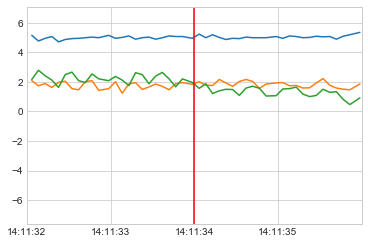

In [155]:
fig = plt.figure()
ax = plt.axes()

time_frame = 2

pad = 1

whole_print = acc[ (acc[ 'time_samp' ] > (start_time - dt.timedelta(seconds = (time_frame + pad))) ) & (acc[ 'time_samp' ] < (end_time + dt.timedelta(seconds = (time_frame + pad)) ) ) ]

overall_min = np.min( [np.min(whole_print['x_cal']), np.min(whole_print['y_cal']), np.min(whole_print['z_cal']) ] )
overall_max = np.max( [np.max(whole_print['x_cal']), np.max(whole_print['y_cal']), np.max(whole_print['z_cal']) ] ) + 1


ax.plot(short[ 'time_samp' ], short['x_cal'])
ax.plot(short[ 'time_samp' ], short['y_cal'])
ax.plot(short[ 'time_samp' ], short['z_cal'])
plt.xlim((start_time - dt.timedelta(seconds = (time_frame ))),  (start_time + dt.timedelta(seconds = (time_frame)) ))
plt.ylim( overall_min, overall_max )
plt.axvline(curr_time, c = 'r' ) 
